In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import DBSCAN
from kmodes.kprototypes import KPrototypes

data = pd.read_csv('Marketing_Campaign_Dataset.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Kidhome              100279 non-null  int64  
 6   Teenhome             100279 non-null  int64  
 7   Dt_Customer          100279 non-null  object 
 8   Recency              100279 non-null  int64  
 9   MntWines             100279 non-null  int64  
 10  MntFruits            100279 non-null  int64  
 11  MntMeatProducts      100279 non-null  int64  
 12  MntFishProducts      100279 non-null  int64  
 13  MntSweetProducts     100279 non-null  int64  
 14  MntGoldProds         100279 non-null  int64  
 15  NumDealsPurchases

In [3]:
data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(['Kidhome','Teenhome'],axis = 1,inplace = True)
data.drop(['AcceptedCmp3','AcceptedCmp2','AcceptedCmp1','AcceptedCmp4','AcceptedCmp5','Response'],axis = 1,inplace = True)
data['Age'] = 2025 - data['Year_Birth']
data.drop(['Year_Birth'],axis = 1,inplace = True)
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
data["Loyalty"] = 2025 - data["Dt_Customer"].dt.year
data.drop('Dt_Customer',axis = 1,inplace = True)

In [4]:
data.drop('ID',axis = 1,inplace = True)

In [5]:
data.drop(['Z_CostContact','Z_Revenue'],axis =1,inplace = True)


In [6]:
data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Children,Age,Loyalty
0,Master,Single,491796.22,31,1364,72,1129,45,69,206,0,1,21,6,14,0,1,47,12
1,Master,Married,513926.78,23,1275,94,455,217,104,61,0,8,14,9,5,0,1,51,11
2,Graduation,Alone,521309.22,93,62,127,530,252,237,170,12,26,18,1,1,0,4,53,12
3,PhD,YOLO,231628.91,13,251,87,1153,157,241,197,4,26,18,3,14,0,1,114,12
4,2n Cycle,Divorced,223936.10,65,670,10,650,34,96,321,6,2,23,4,13,0,2,94,12


In [7]:
len(data)

100279

In [8]:
data = data[data['Age']<80]

In [9]:
len(data)

48920

In [10]:
data.reset_index(drop = True,inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48920 entries, 0 to 48919
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            48920 non-null  object 
 1   Marital_Status       48920 non-null  object 
 2   Income               48920 non-null  float64
 3   Recency              48920 non-null  int64  
 4   MntWines             48920 non-null  int64  
 5   MntFruits            48920 non-null  int64  
 6   MntMeatProducts      48920 non-null  int64  
 7   MntFishProducts      48920 non-null  int64  
 8   MntSweetProducts     48920 non-null  int64  
 9   MntGoldProds         48920 non-null  int64  
 10  NumDealsPurchases    48920 non-null  int64  
 11  NumWebPurchases      48920 non-null  int64  
 12  NumCatalogPurchases  48920 non-null  int64  
 13  NumStorePurchases    48920 non-null  int64  
 14  NumWebVisitsMonth    48920 non-null  int64  
 15  Complain             48920 non-null 

In [12]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Education'] = label.fit_transform(data['Education'])

In [13]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse_output=False)
marital_encoded = ohe.fit_transform(data[["Marital_Status"]])
data[ohe.get_feature_names_out()] = marital_encoded

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48920 entries, 0 to 48919
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                48920 non-null  int64  
 1   Marital_Status           48920 non-null  object 
 2   Income                   48920 non-null  float64
 3   Recency                  48920 non-null  int64  
 4   MntWines                 48920 non-null  int64  
 5   MntFruits                48920 non-null  int64  
 6   MntMeatProducts          48920 non-null  int64  
 7   MntFishProducts          48920 non-null  int64  
 8   MntSweetProducts         48920 non-null  int64  
 9   MntGoldProds             48920 non-null  int64  
 10  NumDealsPurchases        48920 non-null  int64  
 11  NumWebPurchases          48920 non-null  int64  
 12  NumCatalogPurchases      48920 non-null  int64  
 13  NumStorePurchases        48920 non-null  int64  
 14  NumWebVisitsMonth     

In [15]:
data.drop('Marital_Status',axis = 1,inplace = True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48920 entries, 0 to 48919
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                48920 non-null  int64  
 1   Income                   48920 non-null  float64
 2   Recency                  48920 non-null  int64  
 3   MntWines                 48920 non-null  int64  
 4   MntFruits                48920 non-null  int64  
 5   MntMeatProducts          48920 non-null  int64  
 6   MntFishProducts          48920 non-null  int64  
 7   MntSweetProducts         48920 non-null  int64  
 8   MntGoldProds             48920 non-null  int64  
 9   NumDealsPurchases        48920 non-null  int64  
 10  NumWebPurchases          48920 non-null  int64  
 11  NumCatalogPurchases      48920 non-null  int64  
 12  NumStorePurchases        48920 non-null  int64  
 13  NumWebVisitsMonth        48920 non-null  int64  
 14  Complain              

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

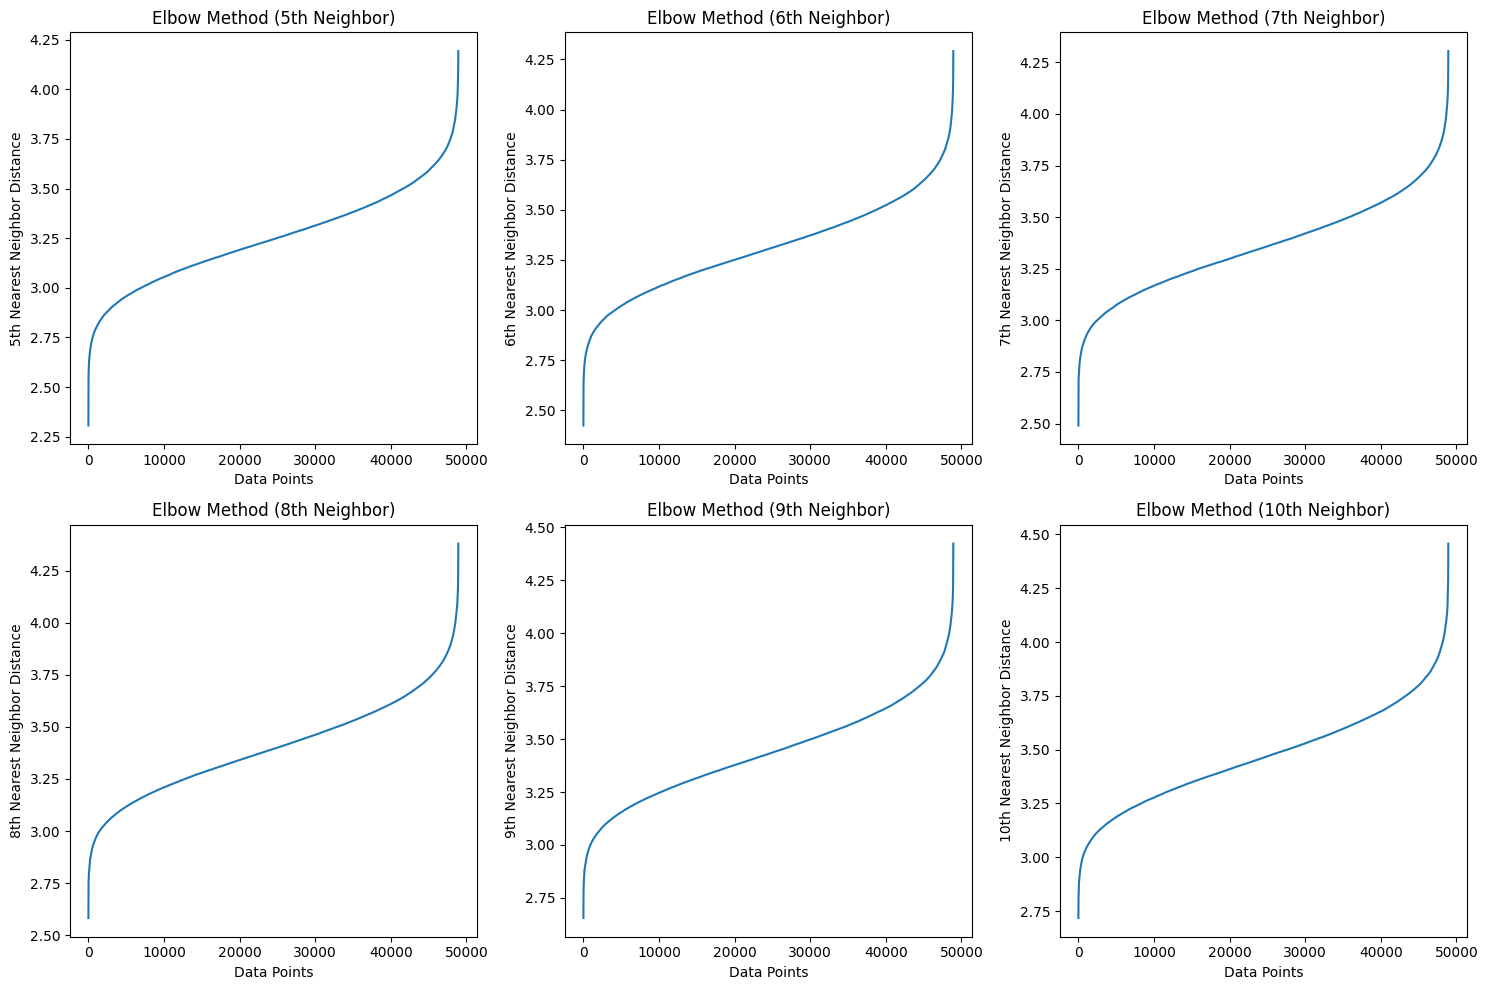

In [18]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=54)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)
test = [5, 6, 7, 8, 9, 10]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, i in enumerate(test):
    row, col = divmod(idx, 3)
    sorted_distances = np.sort(distances[:, i-1], axis=0)
    axes[row, col].plot(sorted_distances)
    axes[row, col].set_xlabel("Data Points")
    axes[row, col].set_ylabel(f"{i}th Nearest Neighbor Distance")
    axes[row, col].set_title(f"Elbow Method ({i}th Neighbor)")

plt.tight_layout()
plt.show()


In [19]:
dbs = DBSCAN(eps = 3.55,min_samples = 45)
labels = dbs.fit_predict(data_scaled)
data['Outliers'] = labels

In [20]:
data['Outliers'].unique()

array([ 0, -1,  1])

In [21]:
data= data[(data['Outliers']!=-1)]

In [22]:
data.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Age,Loyalty,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Outliers
0,3,491796.22,31,1364,72,1129,45,69,206,0,...,47,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,3,513926.78,23,1275,94,455,217,104,61,0,...,51,11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,4,527818.67,96,946,13,458,26,245,213,2,...,35,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,1,624955.37,19,1421,76,197,208,210,204,9,...,64,12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,1,27181.53,14,1457,170,1615,52,107,29,12,...,59,12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [23]:
data.drop('Outliers',axis = 1,inplace = True)

In [24]:
data_scaled = scaler.fit_transform(data)

In [25]:
data_scaled = pd.DataFrame(data = data_scaled, columns = data.columns)

In [26]:
data_scaled.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Children,Age,Loyalty,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.740272,0.875002,-0.654005,1.482103,-0.482760,0.555571,-1.153198,-0.839795,0.243033,-1.687801,...,-0.935003,-0.534693,0.054209,-0.374191,-0.376411,-0.382931,2.581888,-0.373180,-0.363759,-0.387015
1,0.740272,0.994947,-0.945279,1.267268,-0.083598,-0.851140,1.231341,-0.362347,-1.198643,-1.687801,...,-0.935003,-0.245993,-1.507759,-0.374191,-0.376411,2.611438,-0.387313,-0.373180,-0.363759,-0.387015
2,1.473061,1.070240,1.712598,0.473102,-1.553239,-0.844879,-1.416607,1.561088,0.312631,-1.206941,...,-0.000163,-1.400792,0.054209,-0.374191,-0.376411,-0.382931,2.581888,-0.373180,-0.363759,-0.387015
3,-0.725307,1.596708,-1.090916,1.619694,-0.410185,-1.389614,1.106569,1.083640,0.223148,0.476069,...,0.934677,0.692281,0.054209,-0.374191,-0.376411,-0.382931,-0.387313,2.679669,-0.363759,-0.387015
4,-0.725307,-1.643151,-1.272963,1.706593,1.295325,1.569906,-1.056153,-0.321423,-1.516806,1.197359,...,-0.000163,0.331406,0.054209,-0.374191,-0.376411,-0.382931,-0.387313,-0.373180,2.749069,-0.387015


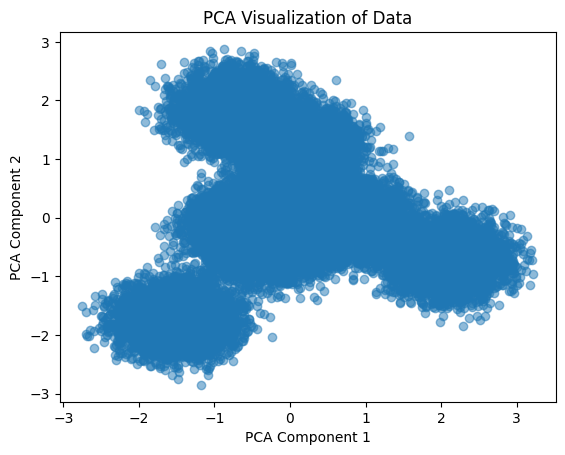

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Data")
plt.show()


### **Concise Observations:**  
1. K-means is rejected, and K-prototypes is unsuitable for purely numerical data.  
2. Hierarchical clustering is computationally expensive, making it inefficient for large datasets (>10,000 rows).  
3. Takes too long for computation on large datasets due to high complexity.  
4. Sensitive to noisy data and outliers, even after proper management.  
5. Residual noise, linkage methods, and variance issues can distort clustering results.